In [1]:
import pandas            as pd
import numpy             as np
import sklearn.metrics   as mt
import matplotlib.pyplot as plt

from sklearn.neighbors    import KNeighborsClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer


/tmp/ipykernel_4913/2240729884.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas            as pd


In [2]:
path_xtrain = 'datasets//X_training.csv'
path_ytrain = 'datasets//y_training.csv'

X_train = pd.read_csv( path_xtrain )
y_train = pd.read_csv( path_ytrain )

path_xtest = 'datasets//X_test.csv'
path_ytest = 'datasets//y_test.csv'

X_test = pd.read_csv( path_xtest )
y_test = pd.read_csv( path_ytest )

path_xval = 'datasets//X_validation.csv'
path_yval = 'datasets//y_validation.csv'

X_val = pd.read_csv( path_xval )
y_val = pd.read_csv( path_yval )


In [3]:
features=  ['age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
      'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

#features=  ['class', 'inflight_wifi_service','online_boarding', 'seat_comfort', 'inflight_entertainment','on_board_service', 'leg_room_service', 'checkin_service', 'inflight_service', 
#       'cleanliness', 'arrival_delay_in_minutes']

X_train = X_train.loc[:, features]
X_test = X_test.loc[:, features]
X_val = X_val.loc[:, features]

In [4]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

# KNeighbors Classifier

In [5]:
#vizinhos_k = [2, 3, 5, 6, 7, 8, 9, 10, 11]
#melhor_k = None
#melhor_desempenho = 0

#for k in vizinhos_k:
#    knn_classifier = KNeighborsClassifier(n_neighbors=k)
#    knn_classifier.fit(X_train, y_train)
#    y_pred = knn_classifier.predict(X_val)

#    recall = mt.recall_score(y_val, y_pred, average='binary', pos_label=1)
#    precision = mt.precision_score(y_val, y_pred, average='binary', pos_label=1)
#    f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1)
#    accuracy = mt.accuracy_score(y_val, y_pred)
    
#    desempenho_atual = (recall + precision + f1 + accuracy) / 4
    
#    if desempenho_atual > melhor_desempenho:
#        melhor_desempenho = desempenho_atual
#        melhor_k = k

#print("Melhor valor de k:", melhor_k)
#print("Melhor desempenho:", melhor_desempenho)


In [6]:

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test) 

knn_rec = mt.recall_score(y_test, y_pred, average='binary', pos_label=1) * 100
knn_pre = mt.precision_score(y_test, y_pred, average='binary', pos_label=1) * 100
knn_acc = mt.accuracy_score(y_test, y_pred) * 100
knn_f1 = mt.f1_score(y_test, y_pred, average='binary', pos_label=1) * 100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Decision Tree

In [7]:
#max_depth = [5,6,7,8,9,10,11,12,13,14]
#melhor_depth = None
#melhor_desempenho = 0

#for m in max_depth:
#    tree_clf = DecisionTreeClassifier(max_depth=m)

#    tree_clf.fit( X_train, y_train )

#    y_pred = tree_clf.predict( X_val )

#    rec = mt.recall_score(y_val, y_pred, average='binary', pos_label=1)
#    pre = mt.precision_score(y_val, y_pred, average='binary', pos_label=1)
#    f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1)
#    acc = mt.accuracy_score(y_val, y_pred)
    
#    desempenho_atual = (rec + pre + f1 + acc) / 4
    
#    if desempenho_atual > melhor_desempenho:
#        melhor_desempenho = desempenho_atual
#        melhor_depth = m

#print("Melhor valor de depth:", melhor_depth)
#print("Melhor desempenho:", melhor_desempenho)


In [8]:
# define
tree_clf = DecisionTreeClassifier(max_depth=15)

# training (fit)
tree_clf.fit( X_train, y_train )

# predict
y_pred = tree_clf.predict( X_test )

dec_rec = mt.recall_score(y_test, y_pred, pos_label=1) * 100
dec_acc = mt.accuracy_score(y_test, y_pred) * 100
dec_pre = mt.precision_score(y_test, y_pred) * 100
dec_f1 = mt.f1_score(y_test, y_pred) * 100

# Random Forest 

In [9]:
#n_estimators = [5,6,7,8,9,10,11,12,13,14,15,20,50]
#max_depth = [4,6,7,8,9,10,11,12,13,14,15,16,20,25]

#melhor_estimator = None
#melhor_depth = None
#melhor_desempenho = 0

#for m in max_depth:
#    for es in n_estimators: 
#        model = RandomForestClassifier( n_estimators=3,max_depth=3)
#        model.fit( X_train, y_train)
#        y_pred = model.predict( X_val )

#        rec = mt.recall_score(y_val, y_pred, average='binary', pos_label=1)
#        pre = mt.precision_score(y_val, y_pred, average='binary', pos_label=1)
#        f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1)
#        acc = mt.accuracy_score(y_val, y_pred)
        
#        desempenho_atual = (rec + pre + f1 + acc) / 4
        
#        if desempenho_atual > melhor_desempenho:
#            melhor_desempenho = desempenho_atual
#            melhor_depth = m
#            melhor_estimator = es

#print("Melhor valor de estimator:", melhor_estimator)
#print("Melhor valor de depth:", melhor_depth)
#print("Melhor desempenho:", melhor_desempenho)

In [10]:
#define
model = RandomForestClassifier( n_estimators=  14,
                                max_depth= 8)

#fit
model.fit( X_train, y_train)

#predict
y_pred = model.predict( X_test )


ran_rec = mt.recall_score(y_test, y_pred, average='binary', pos_label=1)*100
ran_pre = mt.precision_score(y_test, y_pred, average='binary', pos_label=1)*100
ran_f1 = mt.f1_score(y_test, y_pred, average='binary', pos_label=1)*100
ran_acc = mt.accuracy_score(y_test, y_pred)*100


/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


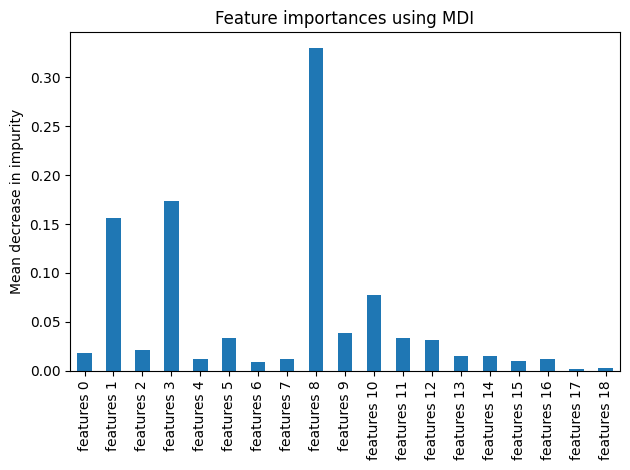

In [11]:
feature_names = [ f'features {i}' for i in range(X_train.shape[1]) ]
importances = model.feature_importances_

forest_importances = pd.Series( importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax )
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

# Logistic Regression

In [12]:

#solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#C = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#max_iter = np.arange(1,20, 1)

#melhor_solver = None
#melhor_C = None
#melhor_max_iter = None
#melhor_desempenho = 0


#for c in C:
#    for m in max_iter:
#        for s in solver:
#            model = LogisticRegression(C=c, max_iter=m, solver=s)

                # Fit
#            model.fit(X_train, y_train)

            # Predict
#            y_pred = model.predict(X_test)

            # Calculate performance metrics
#            recall = mt.recall_score(y_test, y_pred, average='binary', pos_label=1)
#            precision = mt.precision_score(y_test, y_pred, average='binary', pos_label=1)
#            f1 = mt.f1_score(y_test, y_pred, average='binary', pos_label=1)
#            accuracy = mt.accuracy_score(y_test, y_pred)
#                
#                # Calculate current performance
#            desempenho_atual = (recall + precision + f1 + accuracy) / 4

#            if desempenho_atual > melhor_desempenho:
#                melhor_desempenho = desempenho_atual
#                melhor_solver = s
#                melhor_C = c
#                melhor_max_iter = m

#print("Melhor valor de solver:", melhor_solver)
#print("Melhor valor de C:", melhor_C)
#print("Melhor valor de max_iter:", melhor_max_iter)
#print("Melhor desempenho:", melhor_desempenho)


In [13]:
#define
model = LogisticRegression(solver='sag', C=0.5, max_iter=1)

#fit
model.fit( X_train, y_train)

#predict
y_pred = model.predict( X_test )

lr_rec = mt.recall_score(y_test, y_pred, average='binary', pos_label=1)*100
lr_pre = mt.precision_score(y_test, y_pred, average='binary', pos_label=1)*100
lr_f1 = mt.f1_score(y_test, y_pred, average='binary', pos_label=1)*100
lr_acc = mt.accuracy_score(y_test, y_pred)*100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Sobre os dados de teste

In [14]:
f1_lista_test = []
rec_lista_test = []
pre_lista_test = []
acc_lista_test = []

f1_lista_test.append(knn_f1)
rec_lista_test.append(knn_rec)
pre_lista_test.append(knn_pre)
acc_lista_test.append(knn_acc)

f1_lista_test.append(dec_f1)
rec_lista_test.append(dec_rec)
pre_lista_test.append(dec_pre)
acc_lista_test.append(dec_acc)

f1_lista_test.append(ran_f1)
rec_lista_test.append(ran_rec)
pre_lista_test.append(ran_pre)
acc_lista_test.append(ran_acc)

f1_lista_test.append(lr_f1)
rec_lista_test.append(lr_rec)
pre_lista_test.append(lr_pre)
acc_lista_test.append(lr_acc)

In [15]:
algoritimos_test = ['knn_class','Decision_tree', 'Random Forest', 'Logistic Regression'] 

resultados_test = pd.DataFrame({
    'algoritimos':algoritimos_test,
    'accuracy': acc_lista_test,
    'precision': pre_lista_test,
    'recall': rec_lista_test,
    'f1 score': f1_lista_test
})

# Exiba a tabela de resultados
resultados_test

,algoritimos,accuracy,precision,recall,f1 score
0,knn_class,91.928320,93.540513,87.663880,90.506904
1,Decision_tree,93.747345,93.415895,92.256929,92.832795
2,Random Forest,92.828177,92.063352,91.553014,91.807473
3,Logistic Regression,83.902985,84.899622,77.025957,80.771360


# Sobre os dados de treinamento

In [16]:


knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_train) 

trainknn_rec = mt.recall_score(y_train, y_pred, average='binary', pos_label=1) * 100
trainknn_pre = mt.precision_score(y_train, y_pred, average='binary', pos_label=1) * 100
trainknn_acc = mt.accuracy_score(y_train, y_pred) * 100
trainknn_f1 = mt.f1_score(y_train, y_pred, average='binary', pos_label=1) * 100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
# define
tree_clf = DecisionTreeClassifier(max_depth=30)

# training (fit)
tree_clf.fit( X_train, y_train )

# predict
y_pred = tree_clf.predict( X_train )

traindec_rec = mt.recall_score(y_train, y_pred, pos_label=1) * 100
traindec_acc = mt.accuracy_score(y_train, y_pred) * 100
traindec_pre = mt.precision_score(y_train, y_pred) * 100
traindec_f1 = mt.f1_score(y_train, y_pred) * 100

In [18]:
#define
model = RandomForestClassifier( n_estimators=  30,
                                max_depth= 25)

#fit
model.fit( X_train, y_train)

#predict
y_pred = model.predict( X_train )


trainran_rec = mt.recall_score(y_train, y_pred, average='binary', pos_label=1)*100
trainran_pre = mt.precision_score(y_train, y_pred, average='binary', pos_label=1)*100
trainran_f1 = mt.f1_score(y_train, y_pred, average='binary', pos_label=1)*100
trainran_acc = mt.accuracy_score(y_train, y_pred)*100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [19]:
#define
model = LogisticRegression(solver='sag', C=0.5, max_iter=5)

#fit
model.fit( X_train, y_train)

#predict
y_pred = model.predict( X_train )

trainlr_rec = mt.recall_score(y_train, y_pred, average='binary', pos_label=1)*100
trainlr_pre = mt.precision_score(y_train, y_pred, average='binary', pos_label=1)*100
trainlr_f1 = mt.f1_score(y_train, y_pred, average='binary', pos_label=1)*100
trainlr_acc = mt.accuracy_score(y_train, y_pred)*100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
f1_lista_train = []
rec_lista_train = []
pre_lista_train = []
acc_lista_train = []

f1_lista_train.append(trainknn_f1)
rec_lista_train.append(trainknn_rec)
pre_lista_train.append(trainknn_pre)
acc_lista_train.append(trainknn_acc)

f1_lista_train.append(traindec_f1)
rec_lista_train.append(traindec_rec)
pre_lista_train.append(traindec_pre)
acc_lista_train.append(traindec_acc)

f1_lista_train.append(trainran_f1)
rec_lista_train.append(trainran_rec)
pre_lista_train.append(trainran_pre)
acc_lista_train.append(trainran_acc)

f1_lista_train.append(trainlr_f1)
rec_lista_train.append(trainlr_rec)
pre_lista_train.append(trainlr_pre)
acc_lista_train.append(trainlr_acc)

In [21]:
algoritimos_train = ['knn_class', 'Decision_tree', 'Random_Forest', 'Logistic_Regression'] 

resultados_train = pd.DataFrame({
    'algoritimos':algoritimos_train,
    'accuracy': acc_lista_train,
    'precision': pre_lista_train,
    'recall': rec_lista_train,
    'f1 score': f1_lista_train
})

# Exiba a tabela de resultados
resultados_train

,algoritimos,accuracy,precision,recall,f1 score
0,knn_class,93.889540,95.595339,90.050274,92.739993
1,Decision_tree,99.940702,99.949072,99.914089,99.931578
2,Random_Forest,99.937944,99.984073,99.872725,99.928368
3,Logistic_Regression,84.826588,84.252893,79.928726,82.033865


# Sobre os dados de validaçao

In [22]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_val) 

valknn_rec = mt.recall_score(y_val, y_pred, average='binary', pos_label=1) * 100
valknn_pre = mt.precision_score(y_val, y_pred, average='binary', pos_label=1) * 100
valknn_acc = mt.accuracy_score(y_val, y_pred) * 100
valknn_f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1) * 100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
# define
tree_clf = DecisionTreeClassifier(max_depth=30)

# training (fit)
tree_clf.fit( X_train, y_train )

# predict
y_pred = tree_clf.predict( X_val )

valdec_rec = mt.recall_score(y_val, y_pred, pos_label=1) * 100
valdec_acc = mt.accuracy_score(y_val, y_pred) * 100
valdec_pre = mt.precision_score(y_val, y_pred) * 100
valdec_f1 = mt.f1_score(y_val, y_pred) * 100


In [24]:
#define
model = RandomForestClassifier( n_estimators=  30,
                                max_depth= 25)

#fit
model.fit( X_train, y_train)

#predict
y_pred = model.predict( X_val )


valran_rec = mt.recall_score(y_val, y_pred, average='binary', pos_label=1)*100
valran_pre = mt.precision_score(y_val, y_pred, average='binary', pos_label=1)*100
valran_f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1)*100
valran_acc = mt.accuracy_score(y_val, y_pred)*100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [25]:
#define
model = LogisticRegression(solver='sag', C=0.5, max_iter=5)

#fit
model.fit( X_train, y_train)

#predict
y_pred = model.predict( X_val )

vallr_rec = mt.recall_score(y_val, y_pred, average='binary', pos_label=1)*100
vallr_pre = mt.precision_score(y_val, y_pred, average='binary', pos_label=1)*100
vallr_f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1)*100
vallr_acc = mt.accuracy_score(y_val, y_pred)*100

/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gustavo/.pyenv/versions/3.11.8/envs/KNN/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
f1_lista_val = []
rec_lista_val = []
pre_lista_val = []
acc_lista_val = []

f1_lista_val.append(valknn_f1)
rec_lista_val.append(valknn_rec)
pre_lista_val.append(valknn_pre)
acc_lista_val.append(valknn_acc)

f1_lista_val.append(valdec_f1)
rec_lista_val.append(valdec_rec)
pre_lista_val.append(valdec_pre)
acc_lista_val.append(valdec_acc)

f1_lista_val.append(valran_f1)
rec_lista_val.append(valran_rec)
pre_lista_val.append(valran_pre)
acc_lista_val.append(valran_acc)

f1_lista_val.append(vallr_f1)
rec_lista_val.append(vallr_rec)
pre_lista_val.append(vallr_pre)
acc_lista_val.append(vallr_acc)

In [27]:
algoritimos_val = ['knn_class', 'Decision_tree', 'Random_Forest', 'Logistic_Regression'] 

resultados_val = pd.DataFrame({
    'algoritimos':algoritimos_val,
    'accuracy': acc_lista_val,
    'precision': pre_lista_val,
    'recall': rec_lista_val,
    'f1 score': f1_lista_val
})

# Exiba a tabela de resultados
resultados_val

,algoritimos,accuracy,precision,recall,f1 score
0,knn_class,92.020335,93.397046,87.794194,90.508993
1,Decision_tree,92.937353,91.375514,92.427055,91.898276
2,Random_Forest,95.106020,96.010474,92.553270,94.250180
3,Logistic_Regression,83.734998,80.296702,82.782686,81.520746


# as tabelas

In [28]:
resultados_train

,algoritimos,accuracy,precision,recall,f1 score
0,knn_class,93.889540,95.595339,90.050274,92.739993
1,Decision_tree,99.940702,99.949072,99.914089,99.931578
2,Random_Forest,99.937944,99.984073,99.872725,99.928368
3,Logistic_Regression,84.826588,84.252893,79.928726,82.033865


In [29]:
resultados_test

,algoritimos,accuracy,precision,recall,f1 score
0,knn_class,91.928320,93.540513,87.663880,90.506904
1,Decision_tree,93.747345,93.415895,92.256929,92.832795
2,Random Forest,92.828177,92.063352,91.553014,91.807473
3,Logistic Regression,83.902985,84.899622,77.025957,80.771360


In [30]:
resultados_val

,algoritimos,accuracy,precision,recall,f1 score
0,knn_class,92.020335,93.397046,87.794194,90.508993
1,Decision_tree,92.937353,91.375514,92.427055,91.898276
2,Random_Forest,95.106020,96.010474,92.553270,94.250180
3,Logistic_Regression,83.734998,80.296702,82.782686,81.520746
